# Анализ компьютерных игр

## 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv(f'datasets/games.csv')  # Локальный путь
except:
    df = pd.read_csv(f'/datasets/games.csv')  # Серверный путь

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [5]:
df.query("User_Score == 'tbd'")['User_Score'].count()/len(df)

0.1450194436135208

In [6]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
df['Year_of_Release'].isna().sum()/len(df)

0.01609332934489979

In [9]:
df.loc[df['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

- Name- название игры -тип данных соответствует данным. Отсутствует 2 записи, теже что и в Genre -удаляем
- Platform – платформа - тип данных соответствует данным
- Year_of_Release -год выпуска- приводим к int64, nan- значений 1,5% от общего числа наблюдейний- удаляем
- Genre -жанр игры- тип данных соответствует данным. Отсутствует 2 записи, теже что и в Name -удаляем
- NA_sales -продажи в Северной Америке (млн проданных копий) - тип данных соответствует данным
- EU_sales –продажи в Европе (млн проданных копий) -тип данных соответствует данным
- JP_sales – продажи в Японии (млн проданных копий) - тип данных соответствует данным
- Other_sales –продажи в других странах (млн проданных копий)
- Critic_Score –оценка критиков (максимум 100)- тип данных нужно приводить к int64. Для удаления/ замены на '0' слишком много значений -> заменим на маркер '-418' ;)
- User_Score – оценка пользователей (максимум 10)- тип данных нужно приводить к int64. В столбце присутствуют буквы/символы -нужно избавлятся от них. Для удаления/ замены на '0' слишком много значений -> заменим на маркер '-418' ;) , аналогично поступам с NaN 
- Rating -рейтинг от организации ESRB. Указана возрастная категория. тип данных соответствует данным, пропуски заменяем на маркер '-418'

## 2. Предобработка данных

- замените названия столбцов(привести к нижнему регистру)
- Преобразовать тип данных. Объяснить где и почему
- Обработать пропуски
- Посчитайте сумарные продажи во всех регионах и запишите их в отдельный столбец

In [11]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

***Обработка пропусков***

In [12]:
df.dropna(subset = ['name','year_of_release','genre'], inplace = True)

In [13]:
df['critic_score'] = df['critic_score'].fillna(-418)
df['user_score'] = df['user_score'].fillna(-418)
df['rating'] = df['rating'].fillna(-418)
df['user_score'] =df['user_score'].replace('tbd', -418)
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [14]:
df['user_score'].unique()

array(['8', -418, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

***Пребразование типов данных***

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [16]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
pd.to_numeric(df['user_score'], errors='coerce').isna().sum()

0

In [17]:
to_int = ['year_of_release', 'critic_score', 'user_score']
for i in to_int:
    df[i] =df[i].astype('int64')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  int64  
 10  rating           16444 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


In [18]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

***Расчет сумарных продаж в регионах***

In [19]:
df['sum_sales'] =df['na_sales'] + df['eu_sales'] +df['jp_sales']+ df['other_sales']
df.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,-418,-418,-418,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,-418,-418,-418,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,-418,-418,-418,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,-418,-418,-418,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,-418,-418,-418,0.01


### Результат предобработки

- названия столбцов приведены к нижнему регистру
- Преобразованы тип данных в столбцах содержащих числовые значения. Для столбца 'user_score' применен метод to_numeric для обработки ошибочных значений, т.к. метод astype сразу не сработал. Ошибочные значения в 'user_score'
- Обработаны пропуски в 'name','year_of_release','genre' и замененены некорректные значения в 'user_score'
- Добавлен в отдельный столбец с сумарными продажами во всех регионах


## 3. Исследовательский анализ данных

### 3.1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'count')

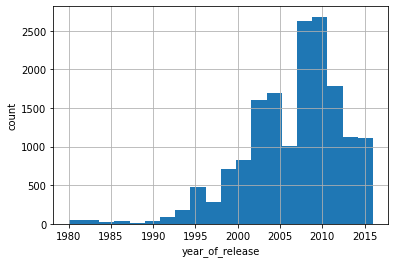

In [20]:
df['year_of_release'].sort_values().hist(bins =20)
plt.xlabel("year_of_release")
plt.ylabel("count")

- [картинка](img/img1.jpg)

In [21]:
df.groupby(['platform'])['sum_sales'].agg('sum').sort_values(ascending =False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

In [22]:
top_platform = df.groupby(['platform'])['sum_sales'].agg('sum').sort_values(ascending =False).head(5).index
top_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

#### Вывод
Начиная с 2002 года начинается существенный рост кол-ва выпускаемых игр. Для построения прогноза на 2017год данные до 2002 года можно исключить

### 3.2. Как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

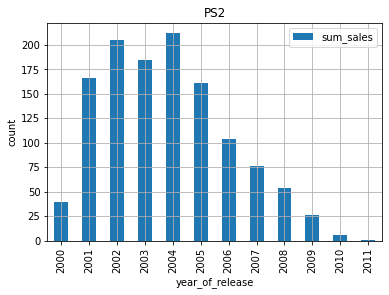

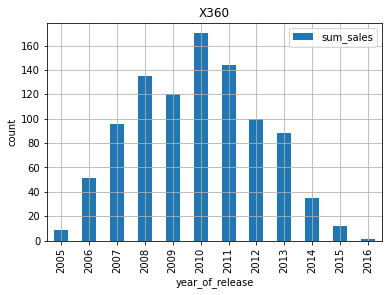

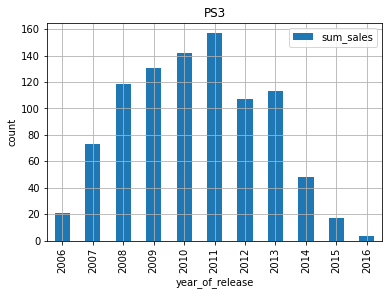

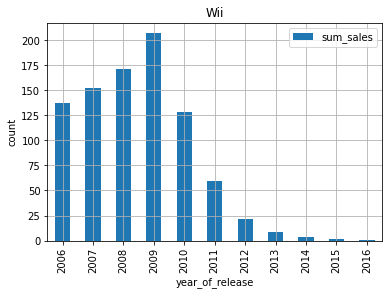

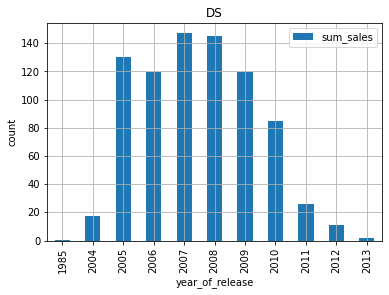

In [23]:
for pl in top_platform:
    pivot= df[df['platform'] == pl].pivot_table(index = 'year_of_release', values = ['sum_sales'], aggfunc = 'sum')
    pivot.plot(kind ='bar',grid=True,ylim=0)
    plt.title(pl)
    plt.xlabel("year_of_release")
    plt.ylabel("count")
    plt.show()
    print()

- [картинка](img/img2.jpg)
- [картинка](img/img3.jpg)

In [53]:
df02 = df.query('year_of_release >= 2002')
df02['year_of_release'].sort_values().head()

13883    2002
9170     2002
13274    2002
9180     2002
10826    2002
Name: year_of_release, dtype: int64

Text(0, 0.5, 'sum_sales')

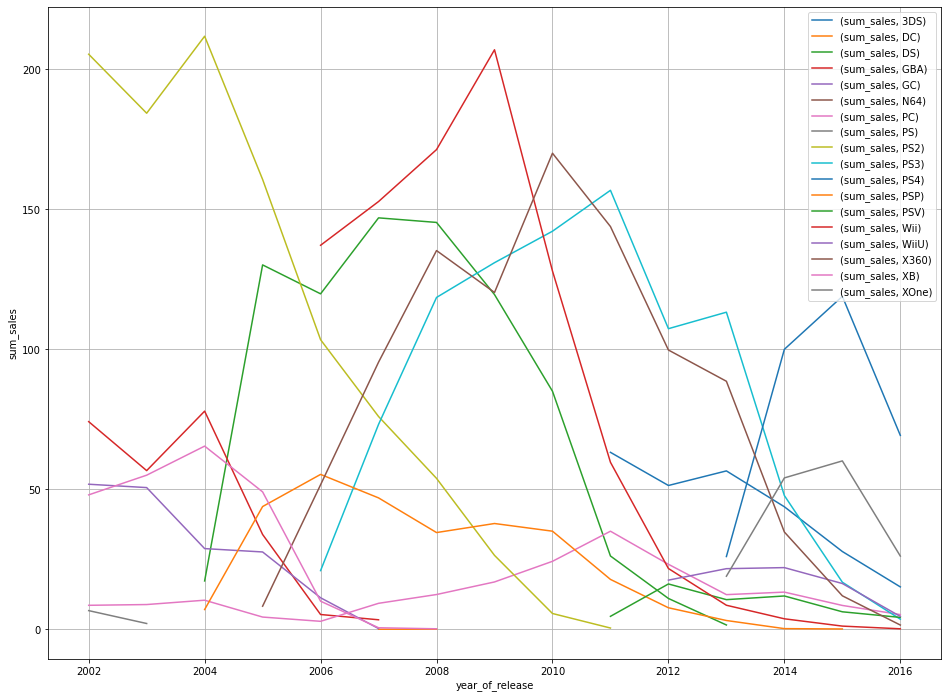

In [25]:
pivot02 = df02.pivot_table(index = 'year_of_release', columns ='platform', values = ['sum_sales'], aggfunc = 'sum')
pivot02.plot( grid=True, figsize=(16,12)).legend(loc ='upper right')
plt.ylabel("sum_sales")

- [картинка](img/img4.jpg)

#### Вывод
При более детальном рассмотрении стало заметно, что с 2001 по 2013 произошли значительные изменения на рынке, по этому дополнительно отсеиваем платформы выпущеные до 2013года

### 3.5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.   

Text(0, 0.5, 'sum_sales')

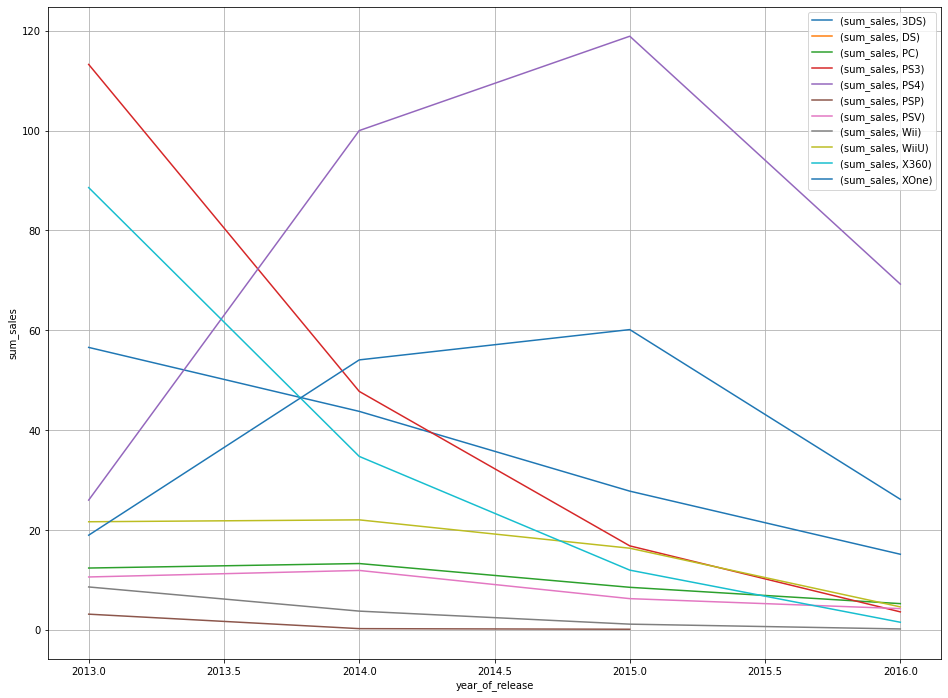

In [26]:
df2013 = df.query('year_of_release >= 2013')
pivot11 = df2013.pivot_table(index = 'year_of_release', columns ='platform', values = ['sum_sales'], aggfunc = 'sum')
pivot11.plot( grid=True, figsize=(16,12)).legend(loc ='upper right')
plt.ylabel("sum_sales")

- [картинка](img/img5.jpg)

#### Вывод 
В 2004 году абсолютным лидеров по продажам являлся PS2, но время идет и в 2011 году лидером по продажам становится PS3.
Смена абсолютного лидера по продажам происходит примерно раз в 5 лет.
По всем платформам наблюдается спад уровня продаж.
На 2016 год прибыльными платформами можно считать только PS4, XOne и X360

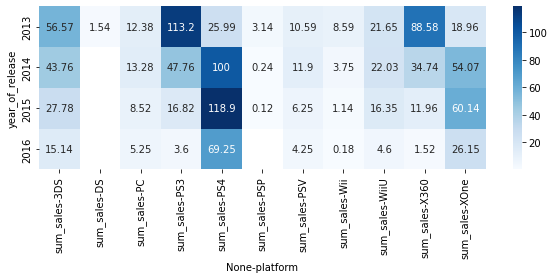

In [27]:
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(pivot11, annot = True, fmt = '.4g', cmap = "Blues")
plt.show()

- [картинка](img/img6.jpg)

### 3.6. Постройте график "ящик с усами" по глобальным продажам игр в разбивке по платформам. Опишите результат

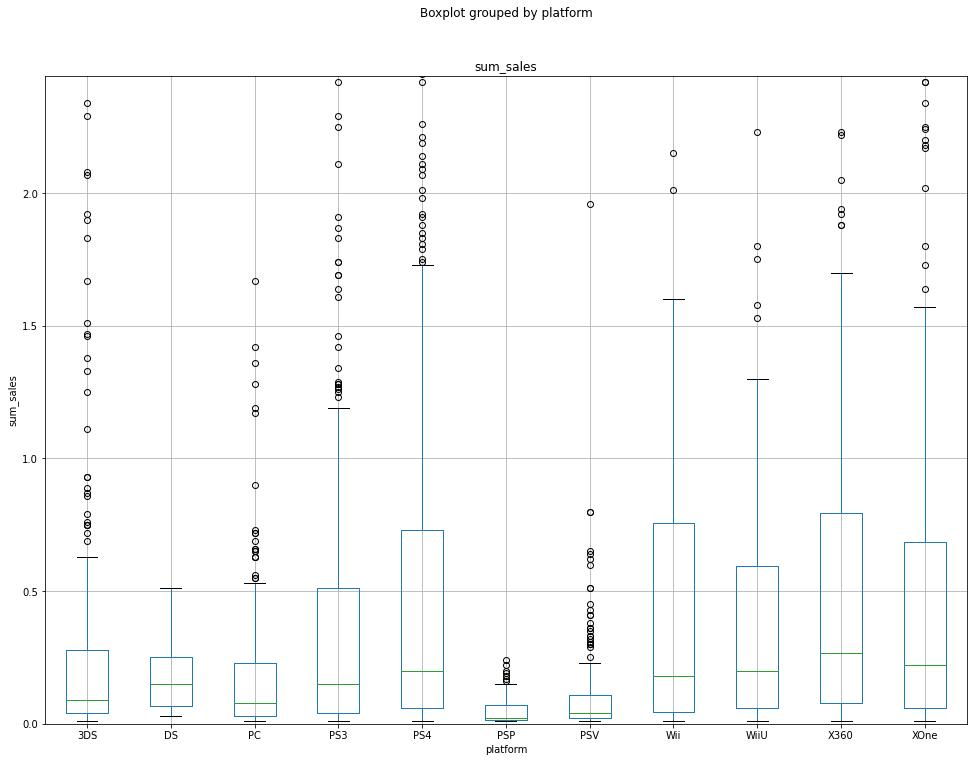

In [28]:
df2013.boxplot(column =['sum_sales'], by ='platform', figsize=(16,12))
plt.ylim(0, df2013['sum_sales'].mean()*5)
plt.ylabel("sum_sales")
plt.show()

- [картинка](img/img7.jpg)

In [29]:
df2013.groupby('platform')['sum_sales'].describe()


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


#### Вывод
1. По всем платформам наблюдается большое кол-во выбросов в данных по глобальным продажам
2. С 2013 года самое большое кол-во продаж и максимальная сумма у PS3

<div class="alert alert-success">
<b>Комментарии ревьюера V2 :</b> 
    
Верно. Здесь мы еще можем обратить внимание не только на максимальные значения, но и на медианы и квантили.  Медиана и 75% квантиль наибольшая у PS4, WiiU, XOne -- отличие выглядит весьма существенным. Эти платформы в среднем наиболее интересны. А PSV выглядит наиболее слабым кандидатом. У X360 достаточно высокие медиана и 75 квантиль, но выше на тепловой карте видно, что к 2017 году, её продажи почти на нуле.


</div>

### 3.7. Rак влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

In [30]:
top_platform = ['PS4', 'XOne', 'X360']

PS4


'Кореляция с отзывами критиков - 0.15488525537745026'

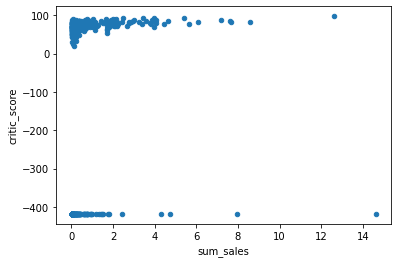

'Кореляция с отзывами пользователей - 0.1300110858049764'

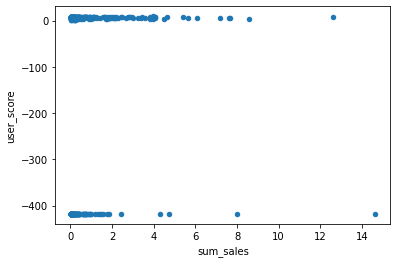

XOne


'Кореляция с отзывами критиков - 0.19606315381961237'

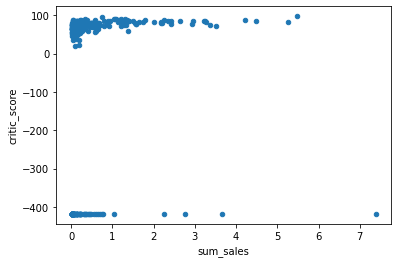

'Кореляция с отзывами пользователей - 0.1495270762255848'

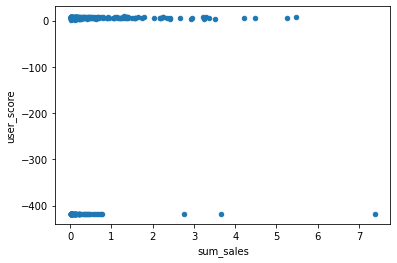

X360


'Кореляция с отзывами критиков - 0.18048573962952508'

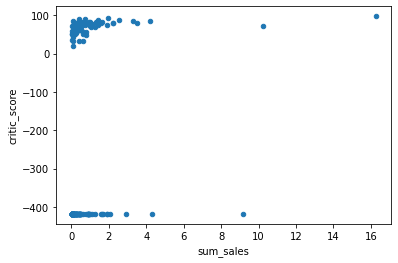

'Кореляция с отзывами пользователей - 0.08464762055208797'

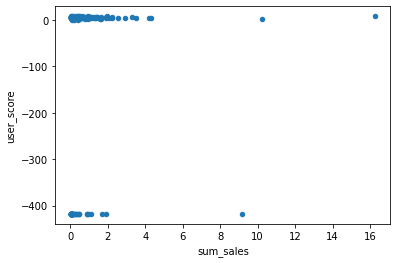

In [31]:
for plat in top_platform:
    q = df2013.query('platform == @plat')
    print(plat)
    display(f"Кореляция с отзывами критиков - {q['sum_sales'].corr(q['critic_score'])}")
    q.plot(kind='scatter',x='sum_sales',y='critic_score')
    plt.show()
    display(f"Кореляция с отзывами пользователей - {q['sum_sales'].corr(q['user_score'])}")
    q.plot(kind='scatter',x='sum_sales',y='user_score')
    plt.show()

- [картинка 1](img/img8.jpg)
- [картинка 2](img/img9.jpg)
- [картинка 3](img/img10.jpg)

#### Вывод
Корреляция между отзывами и продажами слабая

### 3.8. Соотнесите выводы с продажами игр на других платформах

In [32]:
not_top_plat = df2013.query('platform != @top_platform')
not_top_plat['platform'].unique()

array(['PS3', '3DS', 'WiiU', 'Wii', 'PC', 'PSV', 'DS', 'PSP'],
      dtype=object)

PS3


'Кореляция с отзывами критиков - 0.22219600874354117'

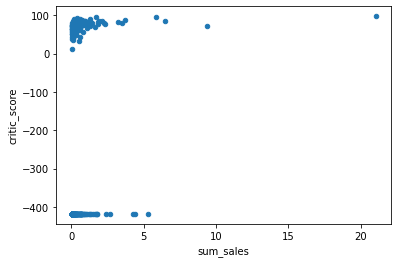

'Кореляция с отзывами пользователей - 0.21794628004954583'

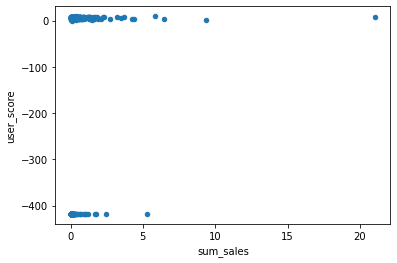

3DS


'Кореляция с отзывами критиков - 0.04156207827410756'

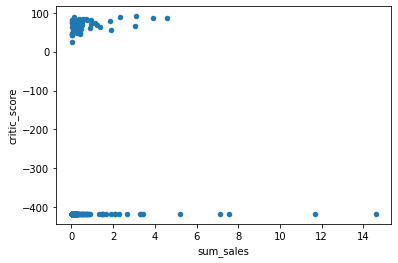

'Кореляция с отзывами пользователей - 0.029759099134608252'

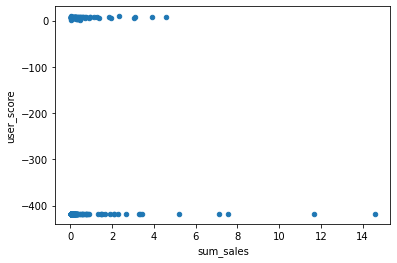

WiiU


'Кореляция с отзывами критиков - 0.22243733930285883'

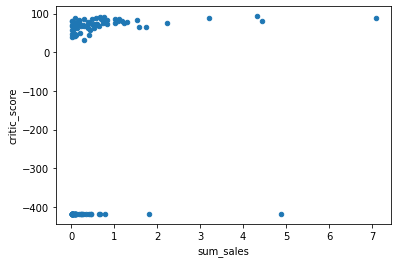

'Кореляция с отзывами пользователей - 0.1375514907433944'

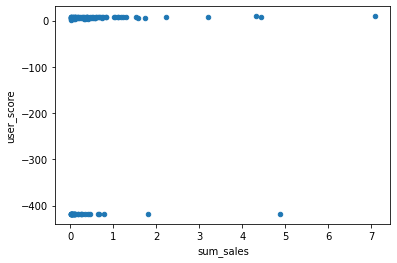

Wii


'Кореляция с отзывами критиков - nan'

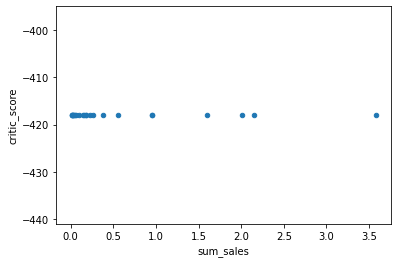

'Кореляция с отзывами пользователей - 0.6760945535460765'

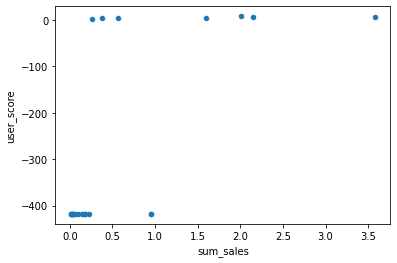

PC


'Кореляция с отзывами критиков - 0.14676900866989015'

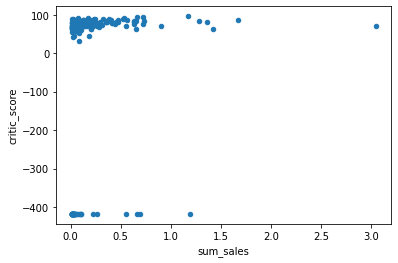

'Кореляция с отзывами пользователей - 0.10577017647435676'

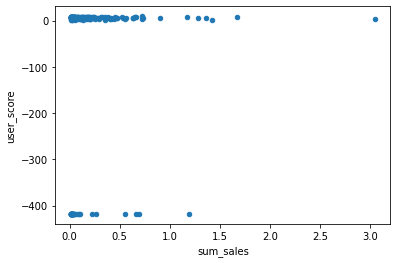

PSV


'Кореляция с отзывами критиков - 0.307834031279509'

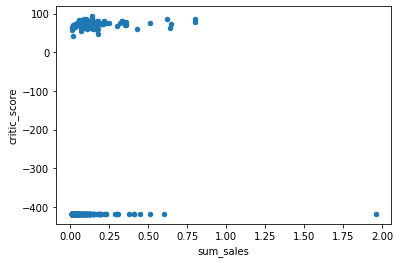

'Кореляция с отзывами пользователей - 0.3315973699187303'

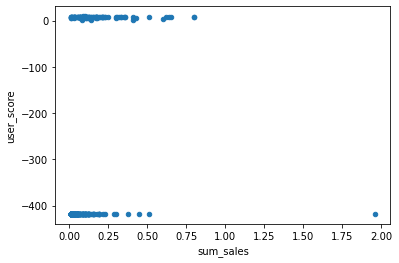

DS


'Кореляция с отзывами критиков - nan'

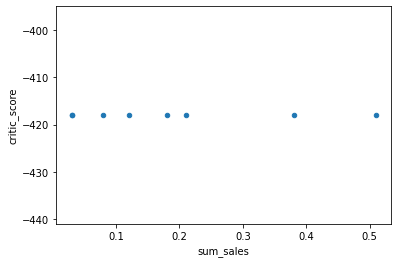

'Кореляция с отзывами пользователей - 0.44040757146749465'

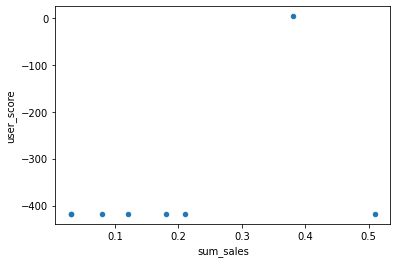

PSP


'Кореляция с отзывами критиков - 0.20285841146625455'

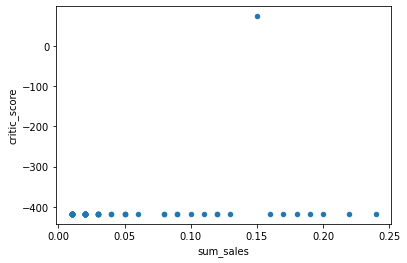

'Кореляция с отзывами пользователей - 0.34786888272420574'

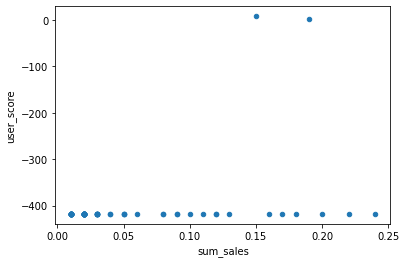

In [33]:
for plat in not_top_plat['platform'].unique():
    q = not_top_plat.query('platform == @plat')
    print(plat)
    display(f"Кореляция с отзывами критиков - {q['sum_sales'].corr(q['critic_score'])}")
    q.plot(kind='scatter',x='sum_sales',y='critic_score')
    plt.show()
    display(f"Кореляция с отзывами пользователей - {q['sum_sales'].corr(q['user_score'])}")
    q.plot(kind='scatter',x='sum_sales',y='user_score')
    plt.show()


- [картинка 1](img/img11.jpg)
- [картинка 2](img/img12.jpg)
- [картинка 3](img/img13.jpg)
- [картинка 4](img/img14.jpg)
- [картинка 5](img/img15.jpg)
- [картинка 6](img/img16.jpg)
- [картинка 7](img/img17.jpg)
- [картинка 8](img/img18.jpg)

#### Вывод
Корреляция между отзывами и продажами на всех платформах слабая, кроме PS2. В случае с PS2 отзывы пользователей оказывают влияние.

### 3.9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [34]:
df2013.groupby('genre')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


Text(0, 0.5, 'sum_sales')

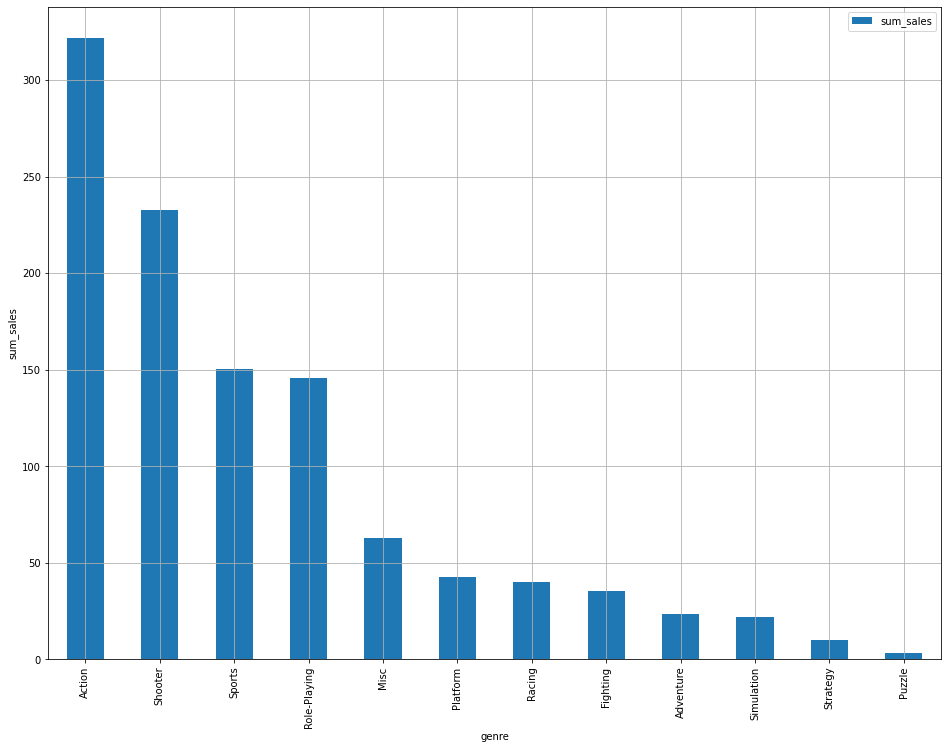

In [35]:
df2013.pivot_table(index = 'genre', values = ['sum_sales'], aggfunc = 'sum').sort_values(by ='sum_sales', ascending = False).plot(kind ='bar', grid=True, figsize=(16,12)).legend(loc ='upper right')
plt.ylabel("sum_sales")

- [картинка](img/img19.jpg)

In [36]:
df2013.pivot_table(index = ['genre'], values = ['na_sales','eu_sales','jp_sales','other_sales','sum_sales'], aggfunc = 'sum').sort_values(by ='sum_sales', ascending = False).head()

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
genre,,,,,
Action,118.13,40.49,126.05,37.20,321.87
Shooter,87.86,6.61,109.74,28.77,232.98
Sports,60.52,5.41,65.27,19.45,150.65
Role-Playing,36.97,51.04,46.40,11.48,145.89
Misc,20.04,9.20,27.49,6.09,62.82


In [37]:
df2013.pivot_table(index = ['genre'], values = ['na_sales','eu_sales','jp_sales','other_sales','sum_sales'], aggfunc = 'sum').sort_values(by ='sum_sales', ascending = False).tail()

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
genre,,,,,
Fighting,8.55,7.65,15.55,3.56,35.31
Adventure,8.25,5.82,7.14,2.43,23.64
Simulation,10.92,4.52,4.86,1.46,21.76
Strategy,4.22,1.77,3.28,0.81,10.08
Puzzle,1.00,1.18,0.83,0.16,3.17


In [38]:
top_genre = ['Action','Shooter','Role-Playing','Sports','Misc']

tail_genre = ['Fighting', 'Simulation','Adventure','Strategy','Puzzle']


In [39]:
df_top_genre = df2013.query("genre in @top_genre")
df_tail_genre = df2013.query("genre in @tail_genre")

Text(0.5, 1.0, 'Популярные жанры')

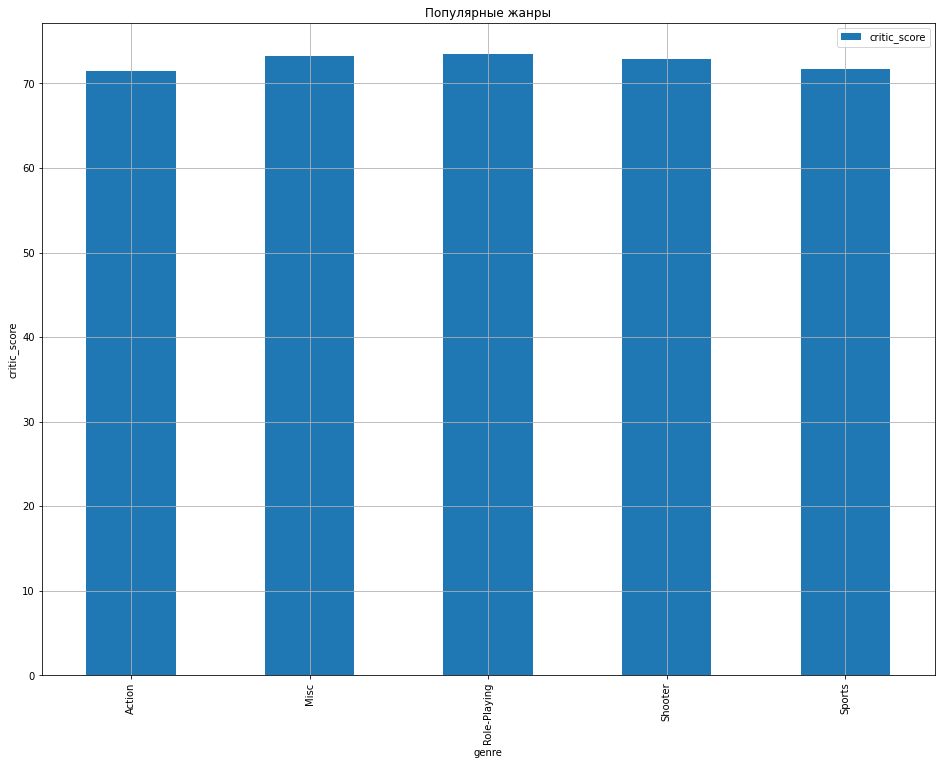

In [40]:
#df_top_genre.query('critic_score != -418').plot(kind='scatter', x='critic_score', y= 'genre')

piv = df_top_genre.query('critic_score != -418')
piv.pivot_table(index = 'genre', values = ['critic_score']).plot(kind ='bar',grid=True, figsize=(16,12))
plt.ylabel("critic_score")
plt.title("Популярные жанры")

- [картинка](img/img20.jpg)

Text(0.5, 1.0, 'Не популярные жанры')

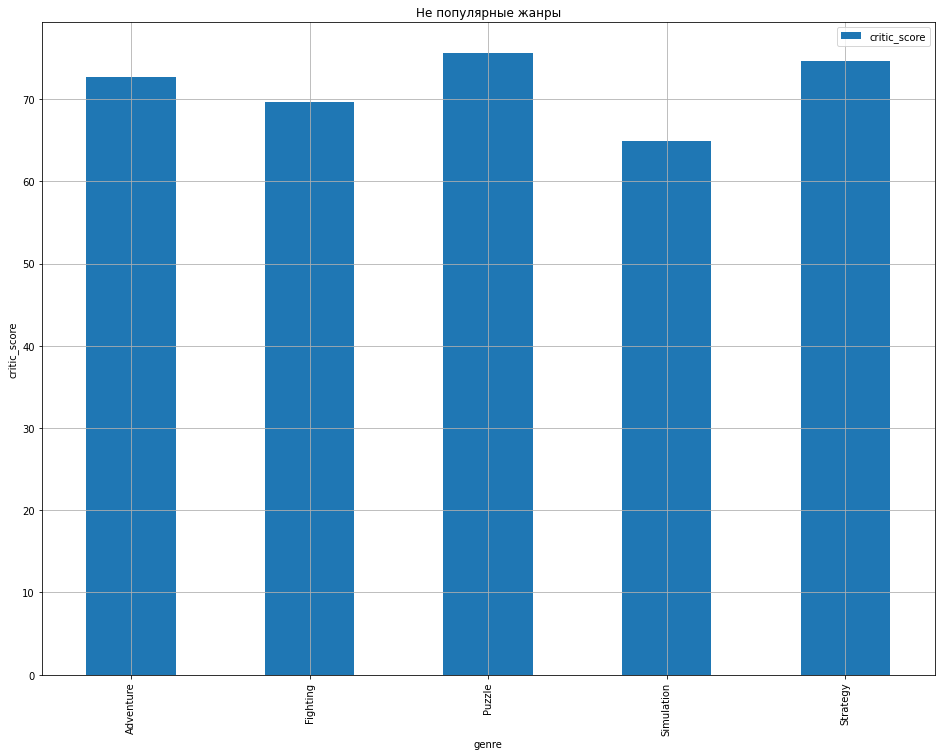

In [41]:
#df_tail_genre.query('critic_score != -418').plot(kind='scatter', x='genre', y='critic_score')
piv_tail = df_tail_genre.query('critic_score != -418')
piv_tail.pivot_table(index = 'genre', values = ['critic_score']).plot(kind ='bar',grid=True, figsize=(16,12))
plt.ylabel("critic_score")
plt.title("Не популярные жанры")

- [картинка](img/img21.jpg)

Text(0.5, 1.0, 'Популярные жанры')

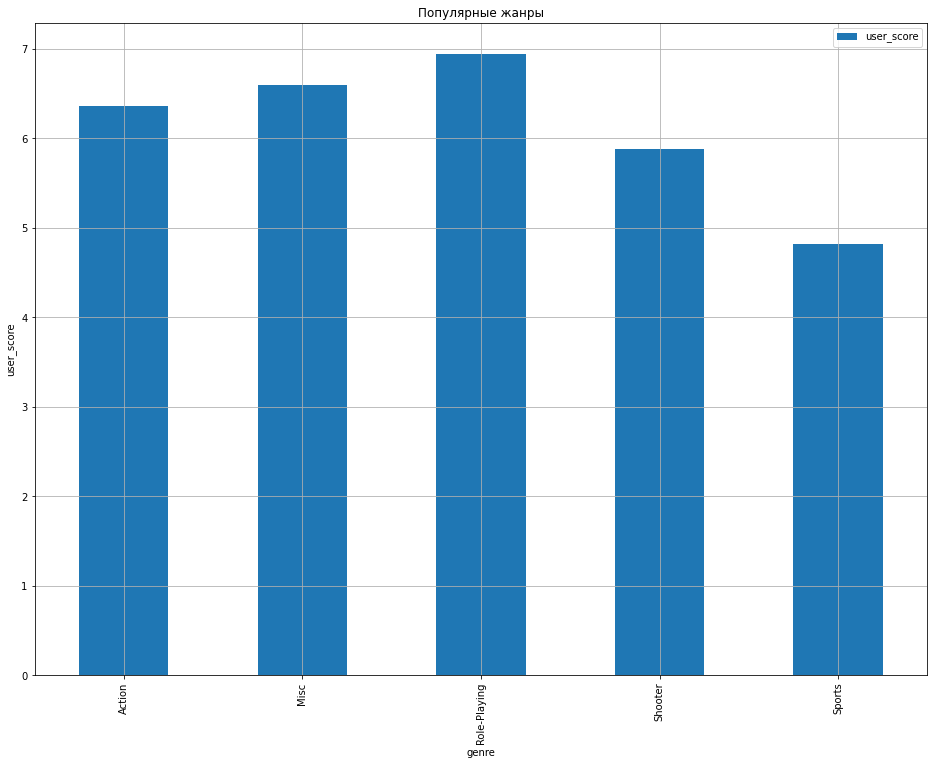

In [42]:
#df_top_genre.query('user_score != -418').plot(kind='scatter', x='genre', y='user_score')
piv = df_top_genre.query('user_score != -418')
piv.pivot_table(index = 'genre', values = ['user_score']).plot(kind ='bar',grid=True, figsize=(16,12))
plt.ylabel("user_score")
plt.title("Популярные жанры")

- [картинка](img/img22.jpg)

Text(0.5, 1.0, 'Не популярные жанры')

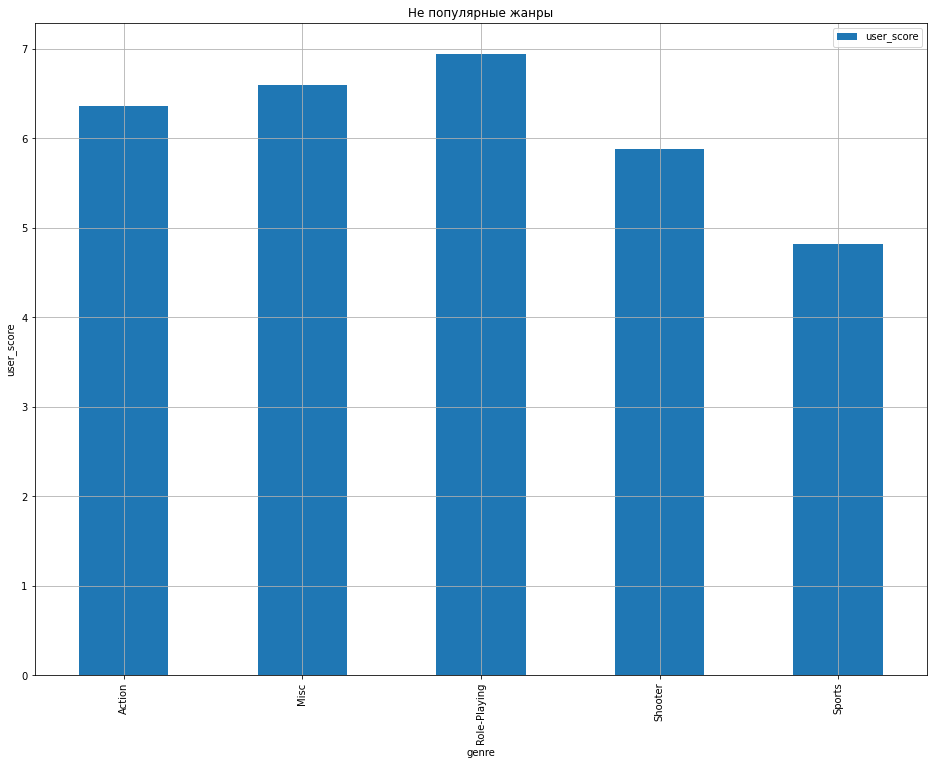

In [43]:
piv_tail = df_tail_genre.query('user_score != -418')
piv.pivot_table(index = 'genre', values = ['user_score']).plot(kind ='bar',grid=True, figsize=(16,12))
plt.ylabel("user_score")
plt.title("Не популярные жанры")

- [картинка](img/img23.jpg)

#### Вывод
В топ-5 самых прибыльных жанров входят: Action, Shooter, Role-Playing, Sports, Misc.
В топ-5 самых НЕ прибыльных жанров входит: Fighting, Simulation, Adventure, Strategy, Puzzle


В случае с прибыльными жанрами оценки критиков и пользователей как правило выше, в отличии от топ-5 Не прибыльных жанров

## 4. Составьте портрет пользователя каждого региона

***Определите для пользователя каждого региона***
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

C:\Users\osia\AppData\Local\Temp\ipykernel_25892\3192424817.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_pivot = top_pivot.append(pivot_pl)
C:\Users\osia\AppData\Local\Temp\ipykernel_25892\3192424817.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_pivot = top_pivot.append(pivot_pl)
C:\Users\osia\AppData\Local\Temp\ipykernel_25892\3192424817.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_pivot = top_pivot.append(pivot_pl)
C:\Users\osia\AppData\Local\Temp\ipykernel_25892\3192424817.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_pivot = top_pivot.append(pivot_pl)


<AxesSubplot:xlabel='platform'>

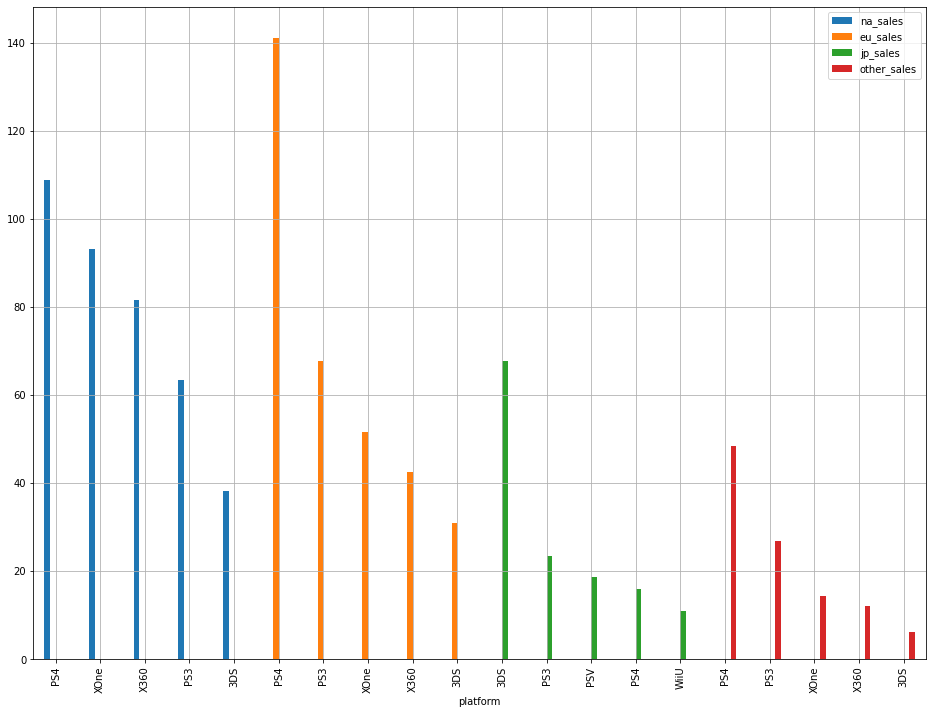

In [44]:
region = ['na_sales','eu_sales','jp_sales','other_sales']
top_pivot = pd.DataFrame()
for r in region:
    pivot_pl = df2013.pivot_table(index = ['platform'], values = [r], aggfunc = 'sum').sort_values(by =r, ascending = False).head()
    pivot_pl['region'] = r
    top_pivot = top_pivot.append(pivot_pl)


top_pivot.plot(kind ='bar' , grid=True, figsize=(16,12))


- [картинка](img/img24.jpg)

C:\Users\osia\AppData\Local\Temp\ipykernel_25892\946843142.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_pivot = top_pivot.append(pivot_pl)
C:\Users\osia\AppData\Local\Temp\ipykernel_25892\946843142.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_pivot = top_pivot.append(pivot_pl)
C:\Users\osia\AppData\Local\Temp\ipykernel_25892\946843142.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_pivot = top_pivot.append(pivot_pl)
C:\Users\osia\AppData\Local\Temp\ipykernel_25892\946843142.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_pivot = top_pivot.append(pivot_pl)


<AxesSubplot:xlabel='genre'>

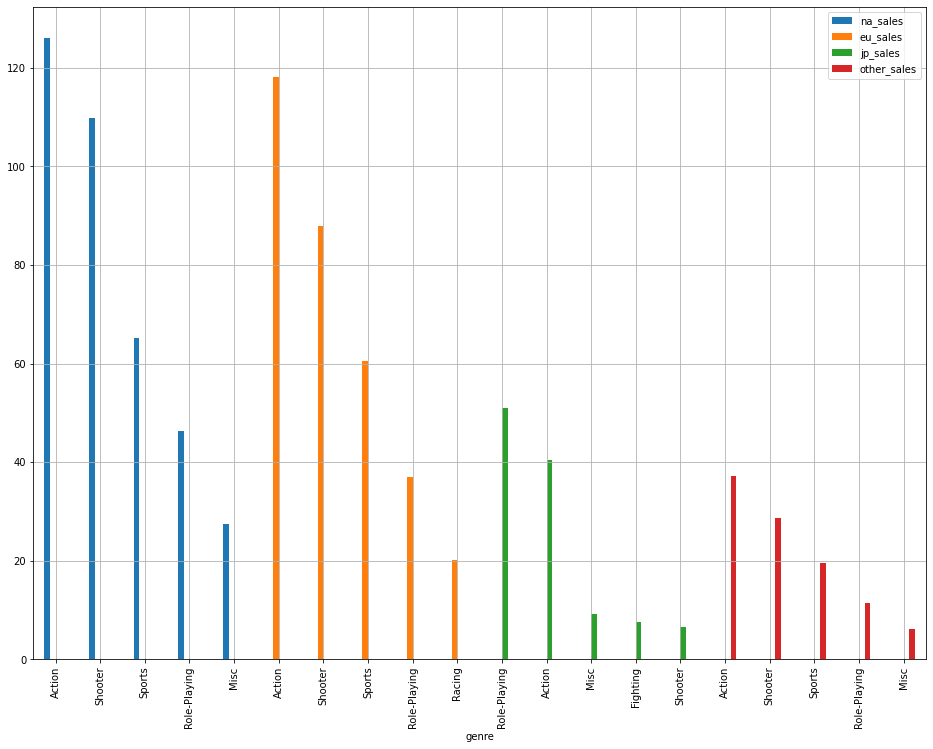

In [45]:
top_pivot = pd.DataFrame()
for r in region:
    pivot_pl = df2013.pivot_table(index = ['genre'], values = [r], aggfunc = 'sum').sort_values(by =r, ascending = False).head()
    pivot_pl['region'] = r
    top_pivot = top_pivot.append(pivot_pl)

top_pivot.plot(kind ='bar' , grid=True, figsize=(16,12))


- [картинка](img/img25.jpg)

In [46]:
df2013.pivot_table(index = ['rating'], values = ['na_sales','eu_sales','jp_sales','other_sales','sum_sales'], aggfunc = 'sum').sort_values(by ='sum_sales', ascending = False)

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
rating,,,,,
M,145.32,14.11,165.21,47.04,371.68
-418,78.91,85.05,89.42,23.46,276.84
E,83.36,15.14,79.05,22.61,200.16
T,41.95,20.59,49.79,14.29,126.62
E10+,42.69,5.89,54.24,12.57,115.39


In [47]:
df2013.pivot_table(index = ['rating','genre','platform'], values = ['na_sales','eu_sales','jp_sales','other_sales','sum_sales'], aggfunc = 'sum').sort_values(by ='sum_sales', ascending = False).head(10)

eu_sales  jp_sales  na_sales  other_sales  \
rating genre        platform                                              
-418   Role-Playing 3DS          11.07     27.86     15.38         2.41   
M      Action       PS4          26.03      2.45     18.16         8.51   
                    PS3          18.80      3.60     17.04         7.93   
       Shooter      PS4          21.86      1.64     16.33         7.25   
E      Sports       PS4          22.26      0.73     14.60         7.05   
M      Shooter      XOne         10.81      0.10     22.40         3.35   
                    X360          8.55      0.20     18.69         2.66   
       Action       X360          9.56      0.17     17.61         2.60   
E      Sports       PS3          11.58      0.72     10.58         4.49   
M      Action       XOne          9.08      0.05     15.51         2.42   

                              sum_sales  
rating genre        platform             
-418   Role-Playing 3DS           56.72  
M      Action       PS4           55.15  
                    PS3           47.37  
       Shooter      PS4           47.08  
E      Sports       PS4           44.64  
M      Shooter      XOne          36.66  
                    X360          30.10  
       Action       X360          29.94  
E      Sports       PS3           27.37  
M      Action       XOne          27.06

### Вывод

1. Во всех странах в топ-5 попадают платформы PS3, PS4, 3DS. X360 и XOne так же попадают в топ везде кроме Японии/
2. Самыми популярными жанрами во всех странах являются Action, Role-Playing, Misc( кроме Европы). Sports и Shooter так же попадают в топ везде кроме Японии
3. рейтинг ESRB по кол-ву продаж предпочтительнее "М" во всех странах. Рейтинг ESRB не влияет на регионы в отделньости.

Рынок Японии отличается от остальных стран своими предпочтениями

## Шаг 5. Проверьте гипотезы 

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sport разные

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы
- Какой критерий применили для проверки гипотез и почему

***Формулирование гипотез***

H0 гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sport одинаковые;

H1 гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC различаются;
- Средние пользовательские рейтинги жанров Action и Sport разные;


Пороговое значение alpha зададим стандартное 0,05

In [48]:
#Составление выборок
selections_dict = {'xone': df2013.query("(platform == 'XOne') and (user_score !=-418)"),
             'pc':  df2013.query("(platform == 'PC') and (user_score !=-418)"),
                  'action': df2013.query("(genre == 'Action') and (user_score !=-418)"),
                  'sport': df2013.query("(genre == 'Sports') and (user_score !=-418)")}
for k in selections_dict.keys():
    display(k, selections_dict[k].head())

'xone'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4,M,3.50


'pc'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3,T,3.05
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86,7,T,1.67
1351,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64,2,E10+,1.42
1437,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81,6,M,1.36
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5,M,1.28


'action'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,12.62
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95,9,M,5.86
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7,M,5.47


'sport'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5,E,7.60
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,-418,4,E,4.28


In [49]:
# Тест Левена для сравнения дисперсий. Если результат будет больше стандартного порога 0,05, то дисперсии можно считать равными

st.levene(selections_dict['xone']['user_score'], selections_dict['pc']['user_score'])

LeveneResult(statistic=10.501440008142538, pvalue=0.0013125294320179338)

Дисперсии выборок отличаются не значимо, по этому при тесте Стьюдента устанавливаем параметр equal_var = True

In [50]:
# Тест Левена для сравнения дисперсий. Если результат будет больше стандартного порога 0,05, то дисперсии можно считать равными

st.levene(selections_dict['action']['user_score'], selections_dict['sport']['user_score'])

LeveneResult(statistic=18.790828715027573, pvalue=1.7364949433351798e-05)

Дисперсии выборок отличаются значимо, по этому при тесте Стьюдента устанавливаем параметр equal_var = False

In [51]:
alpha = 0.05

results = st.ttest_ind(selections_dict['xone']['user_score'], selections_dict['pc']['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу -> Средние пользовательские рейтинги платформ Xbox One и PC разные")
else: 
    print("Не получилось отвергнуть нулевую гипотезу -> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые")

p-значение: 0.06787623789933331
Не получилось отвергнуть нулевую гипотезу -> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [52]:
alpha = 0.05

results = st.ttest_ind(selections_dict['action']['user_score'], selections_dict['sport']['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу -> Средние пользовательские рейтинги жанров Action и Sport разные")
else: 
    print("Не получилось отвергнуть нулевую гипотезу -> Средние пользовательские рейтинги жанров Action и Sport одинаковые")

p-значение: 2.1577418172350983e-19
Отвергаем нулевую гипотезу -> Средние пользовательские рейтинги жанров Action и Sport разные


### Шаг 6. Общий вывод

1. В топ-5 самых прибыльных жанров входят: Action, Shooter, Role-Playing, Sports, Misc. В топ-5 самых НЕ прибыльных жанров входит: Fighting, Simulation, Adventure, Strategy, Puzzle

В случае с прибыльными жанрами оценки критиков и пользователей как правило выше, в отличии от топ-5 Не прибыльных жанров

2. Во всех странах в топ-5 попадают платформы PS3, PS4, 3DS. X360 и XOne так же попадают в топ везде кроме Японии/
3. Самыми популярными жанрами во всех странах являются Action, Role-Playing, Misc( кроме Европы). Sports и Shooter так же попадают в топ везде кроме Японии
4. рейтинг ESRB по кол-ву продаж предпочтительнее "М" во всех странах. Рейтинг ESRB не влияет на регионы в отделньости.

Рынок Японии отличается от остальных стран своими предпочтениями

5. Проверены гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sport разные
